In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

In [2]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
from tqdm import tqdm

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=tqdm(range(len(frames))), interval=50)
    anim.save('movie_cartpole_1.mp4')

In [3]:
ENV = 'CartPole-v0'
NUM_DIGITIZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

In [4]:
class Environment:
    
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                    
                action = self.agent.get_action(observation, episode)
                
                observation_next, _, done, _ = self.env.step(action)
                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                    
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                observation = observation_next
                
                if done:
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step+1))
                    break
            
            if is_episode_final is True:
                display_frames_as_gif(frames)
                break
            
            if complete_episodes >= 10:
                print('10 에피소드 연속 성공')
                is_episode_final = True

In [5]:
class Brain:
    
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIGITIZED**num_states, num_actions))
        
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num+1)[1:-1]
    
    def digitize_state(self, observation):
        # TODO bins 최적화, observation은 무엇인가
        digitized = [np.digitize(param, bins=self.bins(-3.0, 3.0, NUM_DIGITIZED)) for param in observation]
        return sum([x * (NUM_DIGITIZED**i) for i, x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next])
        self.q_table[state, action] = self.q_table[state, action] + ETA*(reward + GAMMA*Max_Q_next - self.q_table[state, action])
                         
    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 / (episode+1)
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
            
        return action

In [6]:
class Agent:
    
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
        
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

0 Episode: Finished after 16 time steps
1 Episode: Finished after 13 time steps
2 Episode: Finished after 37 time steps
3 Episode: Finished after 37 time steps
4 Episode: Finished after 11 time steps
5 Episode: Finished after 15 time steps
6 Episode: Finished after 17 time steps
7 Episode: Finished after 9 time steps
8 Episode: Finished after 32 time steps
9 Episode: Finished after 10 time steps
10 Episode: Finished after 30 time steps
11 Episode: Finished after 12 time steps
12 Episode: Finished after 19 time steps
13 Episode: Finished after 32 time steps
14 Episode: Finished after 9 time steps
15 Episode: Finished after 10 time steps
16 Episode: Finished after 24 time steps
17 Episode: Finished after 23 time steps
18 Episode: Finished after 32 time steps
19 Episode: Finished after 18 time steps
20 Episode: Finished after 47 time steps
21 Episode: Finished after 13 time steps
22 Episode: Finished after 12 time steps
23 Episode: Finished after 17 time steps
24 Episode: Finished after 1

  1%|▊                                                                                 | 1/106 [00:00<00:12,  8.72it/s]

166 Episode: Finished after 106 time steps


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 103/106 [00:01<00:00, 55.46it/s]


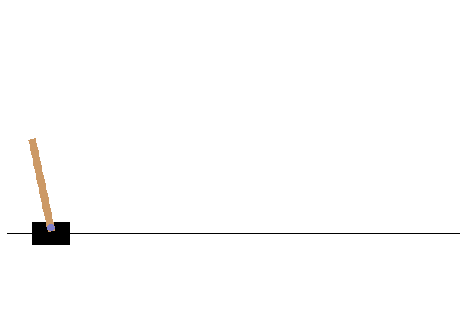

In [7]:
c_env = Environment()
c_env.run()

In [8]:
def show_video_in_jupyter_nb(width, height, video_url):
    from IPython.display import HTML
    return HTML("""<video width="{}" height="{}" controls>
    <source src={} type="video/mp4">
    </video>""".format(width, height, video_url))
video_url = 'movie_cartpole_1.mp4'
show_video_in_jupyter_nb(900, 400,video_url)